In [16]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

In [164]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, trigsimp, integrate
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [2]:
var("x t h θ s ω")

In [41]:
k1 = Symbol("k1", real=True)
k2 = Symbol("k2", real=True)
s = Symbol("s", real=True)
ω = Symbol("ω", real=True)

In [42]:
A1 = Matrix([[0, 1], [-1, 0]])
B1 = Matrix([[0], [1]])
K1 = Matrix([[k1, k2]])

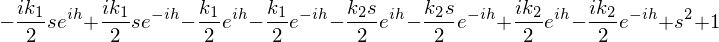

In [43]:
CP = (s*eye(2) - A1 - exp(-A1*h)*B1*K1).det()
CP

In [56]:
CP.subs(k1, 0).subs(k2, -5).subs(h, 1).expand(complex=True).simplify()

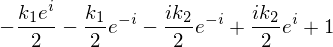

In [45]:
CP.subs(s, 0).subs(h, 1)

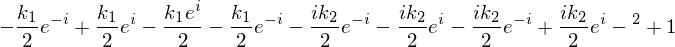

In [46]:
CP.subs(s, I*ω).subs(h, 1)

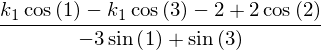

In [47]:
cpre = solve(CP.subs(s, 0).subs(h, 1), k2)
cpre[0].expand(complex=True).simplify()

In [50]:
cpim = solve(CP.subs(s, I*ω).subs(h, 1), k2)
cpim[0].expand(complex=True).simplify()

In [27]:
exp(I).expand(complex=True)

In [172]:
from numpy import cos, sin, linspace, tan

In [59]:
%matplotlib inline
from matplotlib.pyplot import plot, style, figure
style.use("ggplot")

In [131]:
k_1 = linspace(-10, 10, 10000)

In [132]:
k_2 = (k_1*cos(1) - 1)/sin(1)

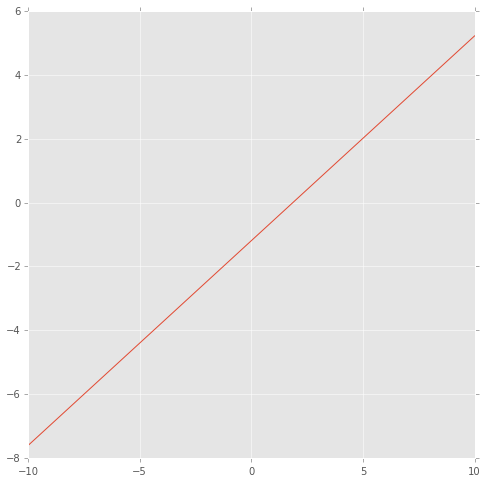

In [133]:
fig = figure(figsize=(8, 8))
plot(k_1, k_2);

In [134]:
om = linspace(-10, 10, 10000)

In [135]:
k_1p = (om**2 - 1)/(-cos(1) - tan(1)*sin(1))
k_2p = k_1p*tan(1)

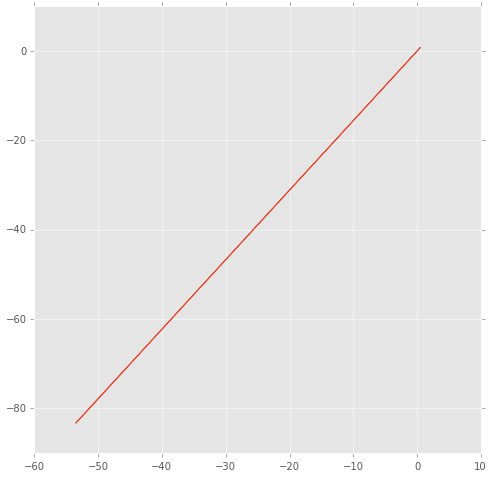

In [136]:
fig = figure(figsize=(8, 8))
plot(k_1p, k_2p);

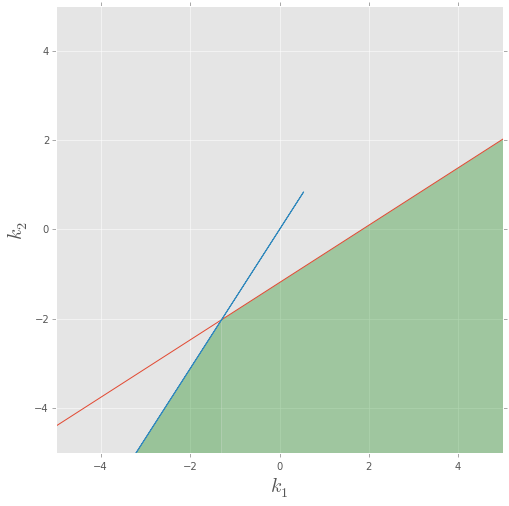

In [152]:
fig = figure(figsize=(8, 8))
plot(k_1, k_2)
plot(k_1p, k_2p)
ax = fig.gca()

ax.fill_between(k_1, -6, k_2, where=k_1>=-1.301, alpha=0.3, facecolor='green')
ax.fill_between(k_1p, -6, k_2p, where=k_1p<=-1.299, alpha=0.18, facecolor='green')

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5);
ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);

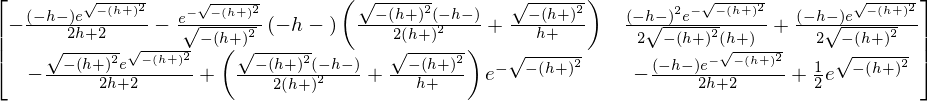

In [67]:
exp(-A1*(θ+h))

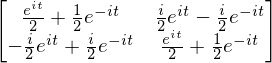

In [38]:
exp(-A1*t)

In [39]:
exp(2*t)

In [40]:
exp(2*t).diff(t)

In [42]:
from sympy.integrals.transforms import laplace_transform
from sympy import sin, cos

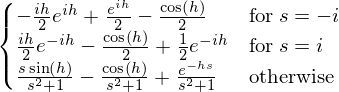

In [43]:
integrate(sin(θ + h)*exp(s*θ), (θ, -h, 0))

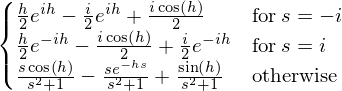

In [44]:
integrate(cos(θ + h)*exp(s*θ), (θ, -h, 0))

In [165]:
PC = s**2 + 1 + k1*I*s*sin(h) - k1*I*cos(h) + k1*I*exp(-s*h) + k2*sin(h) + k2*s*cos(h) - k2*s*exp(-s*h)
PC

In [171]:
PC.subs(k1, 1).subs(k2, 0).subs(h, 1)

In [47]:
PC.subs(h, 1).subs(s, I*ω)

In [48]:
PC.subs(h, 1).subs(s, 0)

In [174]:
from numpy import sin, cos, pi

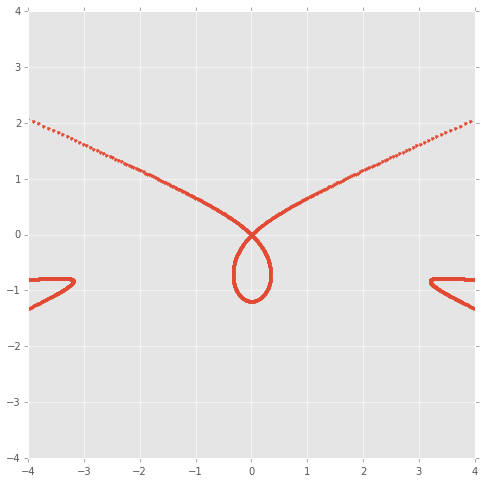

In [204]:
om = linspace(-10*pi, 10*pi, 10000)
f2 = lambda om: (om**2 - 1)/(-om**2*sin(1) + 2*om*sin(om) + sin(1))
f1 = lambda k, om: k*om

k2c = [f2(o) for o in om]
k1c = [f1(o, k) for o, k in zip(om, k2c)]

fig = figure(figsize=(8,8))
plot(k1c, k2c, ".")
ax = fig.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4);

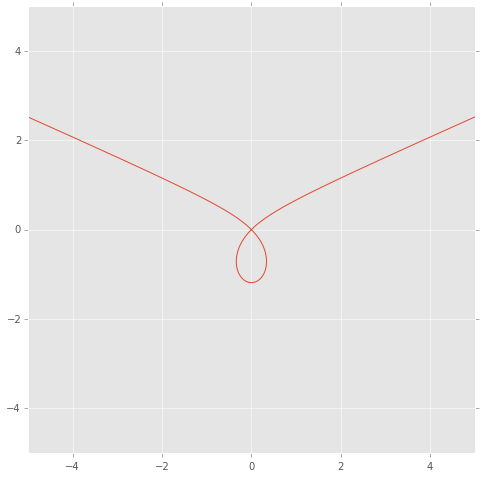

In [211]:
om = linspace(-5.1*pi/8, 5.1*pi/8, 10000)
f2 = lambda om: (om**2 - 1)/(-om**2*sin(1) + 2*om*sin(om) + sin(1))
f1 = lambda k, om: k*om

k2c1 = [f2(o) for o in om]
k1c1 = [f1(o, k) for o, k in zip(om, k2c1)]

fig = figure(figsize=(8,8))
plot(k1c1, k2c1)
ax = fig.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5);

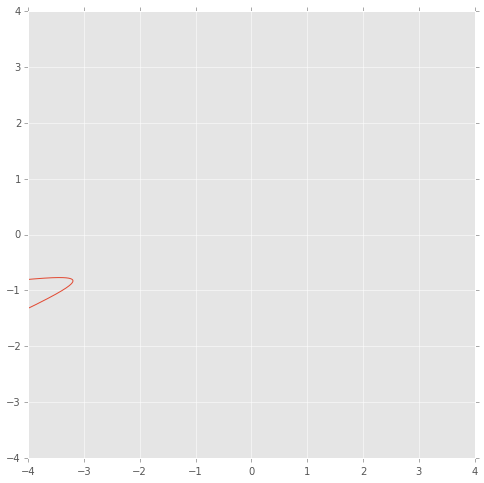

In [206]:
om = linspace(3*pi/4, 2*pi, 10000)
f2 = lambda om: (om**2 - 1)/(-om**2*sin(1) + 2*om*sin(om) + sin(1))
f1 = lambda k, om: k*om

k2c2 = [f2(o) for o in om]
k1c2 = [f1(o, k) for o, k in zip(om, k2c2)]

fig = figure(figsize=(8,8))
plot(k1c2, k2c2)
ax = fig.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4);

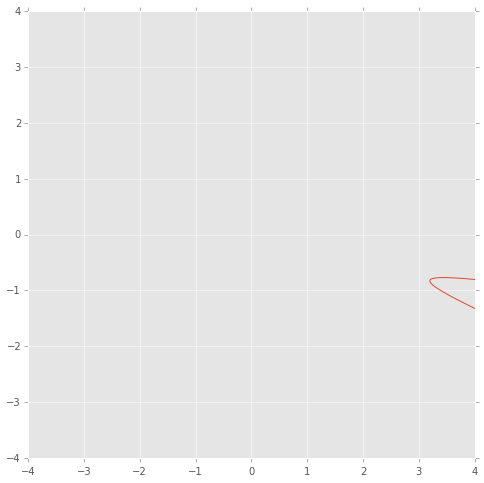

In [207]:
om = linspace(-2*pi, -3*pi/4, 10000)
f2 = lambda om: (om**2 - 1)/(-om**2*sin(1) + 2*om*sin(om) + sin(1))
f1 = lambda k, om: k*om

k2c3 = [f2(o) for o in om]
k1c3 = [f1(o, k) for o, k in zip(om, k2c3)]

fig = figure(figsize=(8,8))
plot(k1c3, k2c3)
ax = fig.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4);

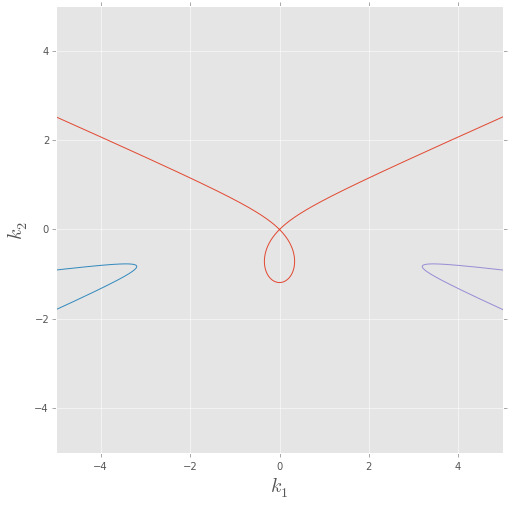

In [212]:
fig = figure(figsize=(8,8))
plot(k1c1, k2c1)
plot(k1c2, k2c2)
plot(k1c3, k2c3)

ax = fig.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5);
ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);